In [ ]:
# Hyperparameters and Model Validation

# напомним как мы обрабатываем логику:
# Choose a class of model 
# Choose model hyperparameters 
# Fit the model to the training data 
# Use the model to predict labels for new data 

# плюс нам нужен механизм валидации - для того чтобы понять 
# что мы выбрали и настроили все корректно 

In [1]:
# Model Validation the Wrong Way 
# получение типичного оверфиттинга - так как 
# у нас не разделяется дата сет 

from sklearn.datasets import load_iris 
iris = load_iris()
X = iris.data 
y = iris.target 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
model.fit(X,y)
y_model = model.predict(X)

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_model)
# кто бы мог подумать что мы получили 1. 
# в этом и есть основная проблема оверфиттинга 
# с другой стороны модель то лучше мы не сделаем 
# мы её только лишь поменять в состоянии 

1.0

In [6]:
# Model Validation the Right Way: Holdout Sets 
# теперь мы поделим датасет на две части - на одном будет тренироваться 
# а на другом тестироваться (как мы помним - можно тренироваться на каждой 
# половине - а потом тестироваться на каждой половине если датасет не большой)

from sklearn.model_selection import train_test_split
# split the date with 50% in each set 
X1,X2,y1,y2 = train_test_split(X,y,random_state=0, train_size=0.5)


In [7]:
# fit the model on one set of data 
model.fit(X1, y1)

# evaluate the model on the second set of data 
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [9]:
# Model Validation via Cross-Validation
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [10]:
# валидация на разных разрезах источника данных (датасете)

from sklearn.model_selection import cross_val_score 
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [11]:
# еще одна модель валидации:

from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [12]:
# у нас получились траялы по одному семплу за раз - где то они удачные где то 
# не удачные (0 там стоят)
# чтобы понять как в целом состоялось вычислим среднее 
scores.mean()

0.96

In [ ]:
# как выбирать модель:
# пробуем более сложные модели - пробуем менее сложные модели (как не странно)
# загружаем больше семплов 
# разбираем больше фич - или стараемся проходить в несколько проходов 
# на разных фичах - если используем PCA 
# фича может быть урезана - в целом - но именно она отличает 
# сомнительный семпл от сомнительного семпла 

In [13]:
# Bias variance trade off 
# суть в том чтобы подобрать чтото среднее между совсем уж 
# прямой линейной регрессией и полифилом - который более менее передает 
# тот датасет который к нам пришел (предварительно его обрезав через PCA 
# иначе мы понять даже не сможем что у нас с ним происходит)

# логика строиться на так называемом Validation score который при увеличении 
# сложности модели в какой то момент начинает падать 
# то есть мы все более и более приближаемся к слишком сложной кривой 
# отчего оверфиттинг все больше и больше чувствуется - таким образом 
# мы получаем все большую и большую ошибку - у нас то есть снижается 
# Validation score как раз 

# y = ax + b  <- от совсем тупого варианта 
# y = ax3 + bx2 + cx + d <- до варианта со степенями 


In [15]:
# Validation Curves in Scikit-Learn

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(
        PolynomialFeatures(degree),
        LinearRegression(**kwargs)
    )


In [24]:
import numpy as np 

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

/tmp/ipykernel_529273/828764766.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


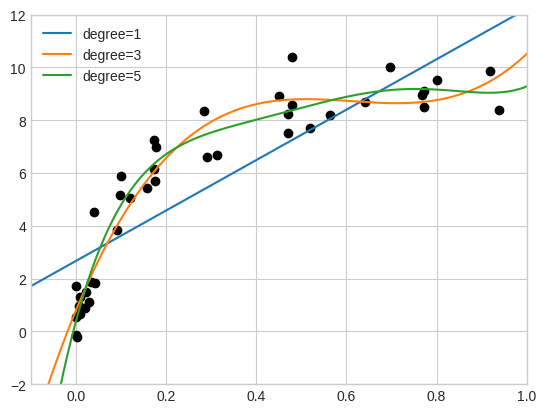

In [25]:
# прямо посмотрим какой уровень полинома нам подходит больше 
# будем последовательно увеличивать степень и проверять на качество 
# модели - которую получаем в итоге 

%matplotlib inline 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")

X_test = np.linspace(-0.1, 1.1, 500)[:,None]

plt.scatter(X.ravel(), y, color="black")
axis = plt.axis()

for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label="degree={0}".format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc="best");

Text(0, 0.5, 'score')

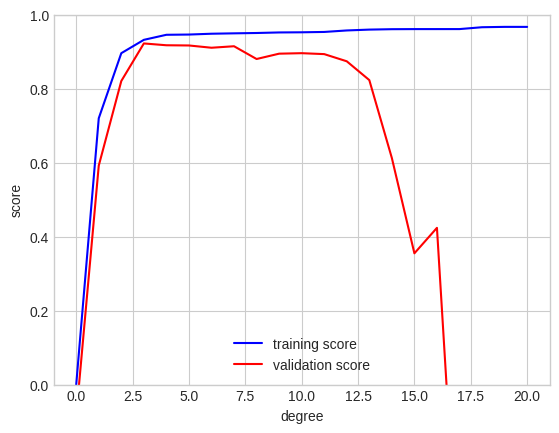

In [28]:
# теперь мы можем построить графи зависимости степени полинома 
# от качества валидации training_score / validation_score 
# фактически - если обходится без графика 

# нам нужно взять вариант полинома - при котором растут 
# и traning_score и validation_score 
# у нас это третья степень (то есть куб) как мы понимаем 

from sklearn.model_selection import validation_curve
degree = np.arange(0,21)
train_score, val_score = validation_curve(
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color="blue", label="training score")
plt.plot(degree, np.median(val_score, 1), color="red", label="validation score")
plt.legend(loc="best")
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("score")

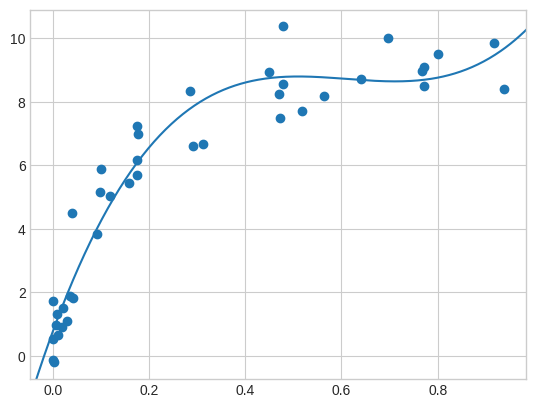

In [29]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

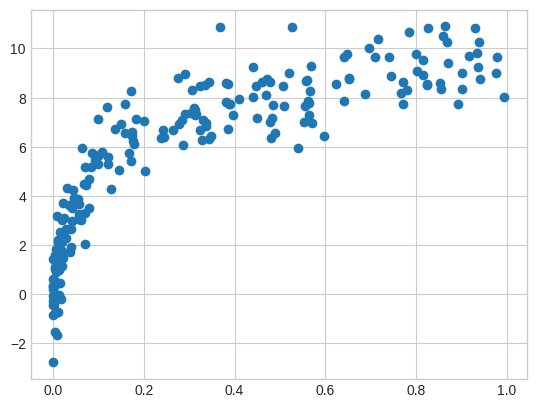

In [31]:
# Learning Curves 

# дата сет у нас теперь побольше 
# применим ту же тактику 
# подберем опять же нужную степень полинома 

X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

Text(0, 0.5, 'score')

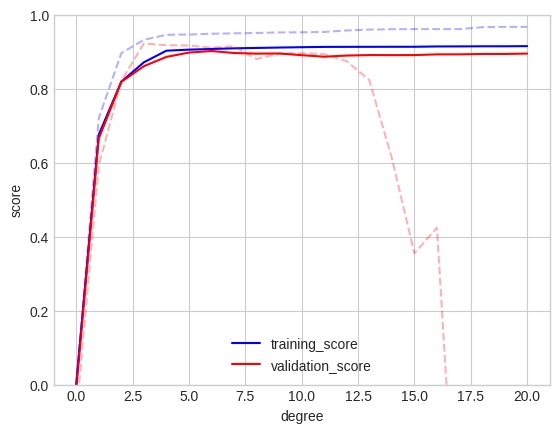

In [34]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(
    PolynomialRegression(), X2, y2, 
    param_name="polynomialfeatures__degree",
    param_range=degree, cv=7
)

plt.plot(degree, np.median(train_score2,1), color="blue", label="training_score")
plt.plot(degree, np.median(val_score2,1), color="red", label="validation_score")
plt.plot(degree, np.median(train_score,1), color="blue", alpha=0.3,
         linestyle="dashed")
plt.plot(degree, np.median(val_score,1), color="red", alpha=0.3,
         linestyle="dashed")
plt.legend(loc="lower center")
plt.ylim(0,1)
plt.xlabel("degree")
plt.ylabel("score")

In [ ]:
# что может происходить:
# сложность модели может вести себя как оверфит на маленьком датасете
# сложность модели андерфит на большом датасете
# кривая обучения и кривая валидации даже не пересекаются
# наступает момент когда добавление данных больше тебе не помогает 
# решение проблем достигается ансамблем моделей - не самой моделью 

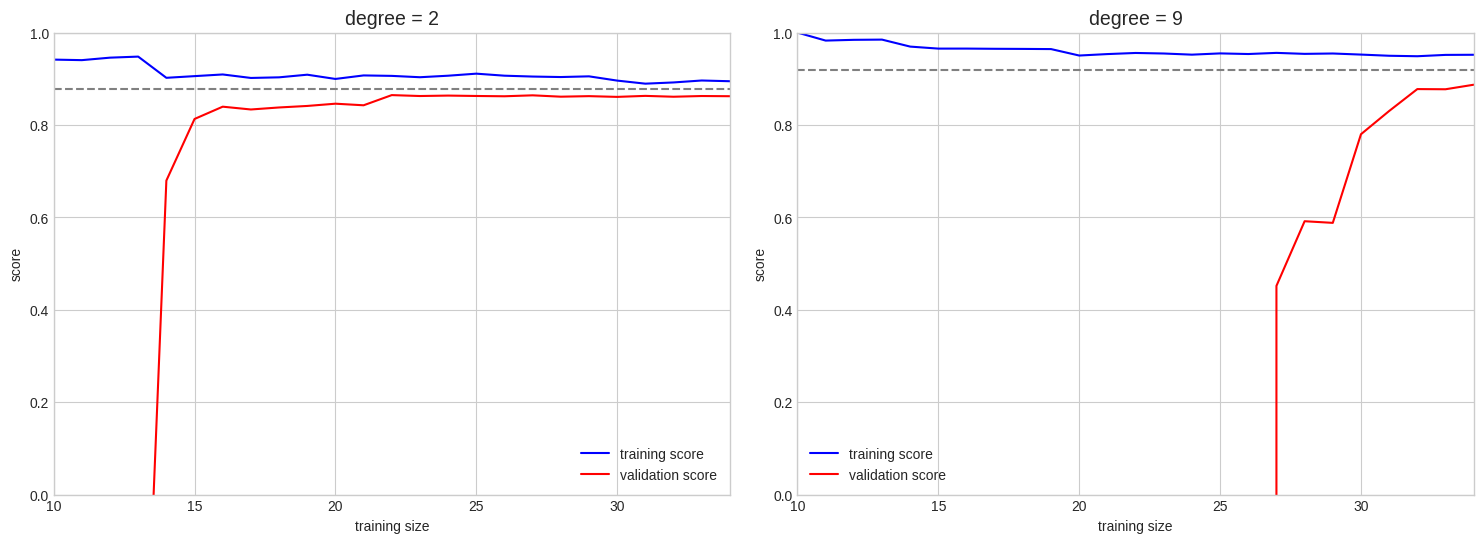

In [36]:
# пробуем с другой моделью 
from sklearn.model_selection import learning_curve

fig,ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(
    PolynomialRegression(degree), X, y, cv=7,
    train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1),
    color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1),
    color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0],
    N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [37]:
# Validation in Practice: Grid Search 

from sklearn.model_selection import GridSearchCV

param_grid = {
    "polynomialfeatures__degree": np.arange(21),
    "linearregression__fit_intercept":[True,False]
}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [38]:
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [39]:
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

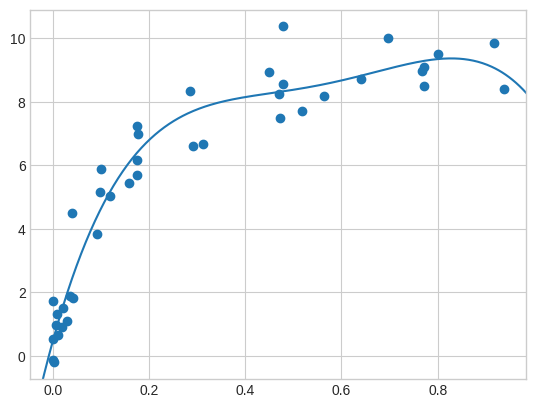

In [40]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim);